In [1]:
# KNN Algorithm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# %%
data = pd.read_csv("data.csv")
# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True) #drop ile istenmeyen sütunlar kaldırılır. axis=1 olmasından dolayı sütunlar kaldırılır. axis=0 olsaydı satırlar kaldırılırdı.
#inplace=True parametresi ile yapılan işlemin kalıcı olması sağlanmıştır.
data.tail() #son n tane satırı getirir. Parametre olarak bir değer belirtilmemiş ise default olarak 5 satır getirir.
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean           ...             radius_worst  texture_worst  \
564         0.1726           ...                   25.450          26.40   
565         0.1752           ...                   23.690          38.25   
566         0.1590           ...                   18.980          34.12   
567         0.2397           ...                   25.740          39.42   
568         0.1587           ...                    9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
564           0.4107                0.2216          0.2060   
565           0.3215                0.1628          0.2572   
566           0.3403                0.1418          0.2218   
567           0.9387                0.2650          0.4087   
568           0.0000                0.0000          0.2871   

     fractal_dimension_worst  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039  

[5 rows x 31 columns]

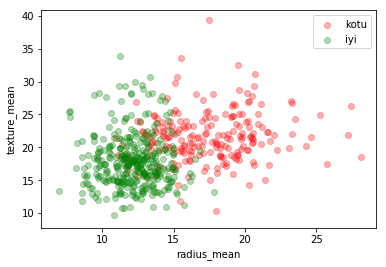

In [2]:
# %%
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()    #Grafik elemanları adlandırdığımız etiketleri grafikte gösterir.
plt.show()

In [3]:
# %%
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1) #drop metodu ve axis=1 parametresi sayesinde sütun kaldırılır.
# diagnosis sütununda "M" olan yerlere 1, "M" olmayan yerlere 0 atanır. Sonra bu değerler y 'ye atanır. 

In [4]:
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
#Normalizasyon işlemi ile değerler 0-1 aralığına çekilmiştir.

In [5]:
#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
#train_test_split() metodu ile test verileri oluşturulmuştur. Sklearn ile test datası oluşturmak bu şekildedir.
#test_size = 0.3 parametresinden dolayı data'nın 0.3'ü test datası olarak oluşturulmuştur.

In [6]:
# %%
# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k (n_neighbors kullanılacak komşu sayısıdır.)
#KNN(K-Nearest Neighbors), içerisinde tahmin edilecek değerin bağımsız değişkenlerinin oluşturduğu vektörün 
#en yakın komşularının hangi sınıfta yoğun olduğu bilgisi üzerinden sınıfını tahmin etmeye dayanır.
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#Ayırdığımız test seti olan x_test 'i kullanarak oluşturduğumuz model ile tahmin yapılmıştır.
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.9532163742690059 


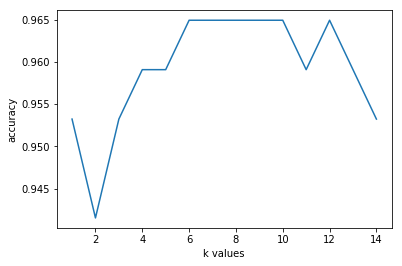

In [7]:
# %%
# find k value
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

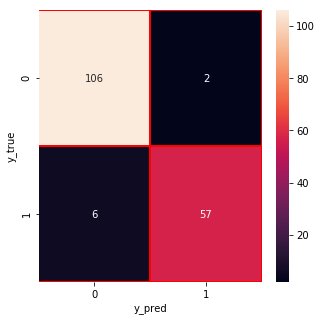

In [9]:
y_pred = knn2.predict(x_test)
y_true = y_test
#%% confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
#Yaptığımız sınıflandırmanın doğruluğunu kontrol etme yöntemlerinden birisi de hata matrisi oluşturmaktır. 
#Hata matrisi için scikit-learn kütüphanesi metrics modülü confusion_matrix fonksiyonu kullanılır.
#Çıktıya göre 6+2=8 kayıt yanlış sınıflandırılmıştır. 106+57=163 kayıt doğru sınıflandırılmıştır.


# %% cm visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
#sns.heatmap() ile grafik oluşturulmuştur. annot = True parametresi sayıların gözükmesini sağlar.
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()